In [47]:
!pip install -Uqq fastai

In [1]:
import fastai
from fastai.vision.all import *
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
path = os.path.abspath('data')

def has_tent(filename):
    return filename[0] == '1'

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=using_attr(has_tent, 'name'),
    item_tfms=Resize(300),
    batch_tfms=aug_transforms(size=100, min_scale=0.75),
)
dls = dblock.dataloaders(path)

In [7]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(1)

RuntimeError: CUDA out of memory. Tried to allocate 66.00 MiB (GPU 0; 7.93 GiB total capacity; 6.95 GiB already allocated; 45.50 MiB free; 7.03 GiB reserved in total by PyTorch)

In [23]:
!pip install ipywidgets
from ipywidgets import *

In [69]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [70]:
img = PILImage.create(uploader.data[0])
has_tent,_,probs = learn.predict(img)
print(f"Does this have a tent?: {has_tent}.")
print(f"Probability it has a tent: {probs[1].item():.6f}")

Does this have a tent?: True.
Probability it has a tent: 0.917247


In [38]:
interp = ClassificationInterpretation.from_learner(learn)

In [39]:
interp.most_confused()

[(False, True, 5), (True, False, 3)]

In [ ]:
lr_min,lr_steep = learn.lr_find()

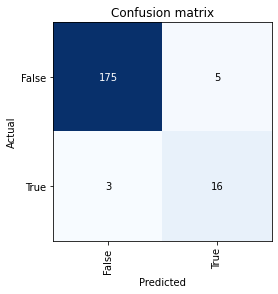

In [40]:
interp.plot_confusion_matrix()

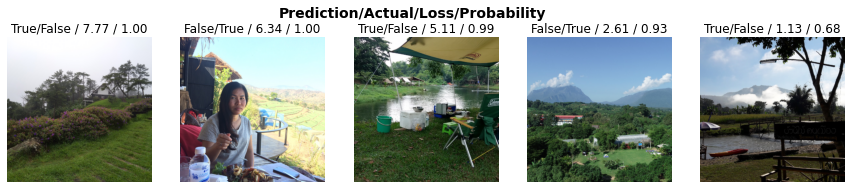

In [41]:
interp.plot_top_losses(5, nrows=1)

In [49]:
import os
learn.save(os.path.abspath('hello.model'))

Path('/workspace/hello.model.pth')

In [68]:
learn.export()